In [7]:
%load_ext autoreload
%autoreload 2

import numpy as np
import scipy
import matplotlib.pyplot as plt
from DataDouble_definition import Data
from functionsDouble import *
from utilities import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
T  = 600
dt = 0.01

t_span = (0, T)
t_eval = np.arange(*t_span, dt)

cmap = plt.get_cmap('jet')
colors = cmap(np.linspace(0, 1, 8))
figsize = (15, 6)

y_init = np.array([
    Data['initial_VS_1'], Data['initial_VD_1'],
    Data['initial_w_1' ], Data['initial_n_1' ], Data['initial_h_1'], Data['initial_c_1'], Data['initial_q_1'],
    Data['initial_Ca_1'],
    Data['initial_VS_2'], Data['initial_VD_2'],
    Data['initial_w_2' ], Data['initial_n_2' ], Data['initial_h_2'], Data['initial_c_2'], Data['initial_q_2'],
    Data['initial_Ca_2']]
)

In [3]:
### First case: both inhibitory neurons

Data['V_12'] = -70
Data['V_21'] = -70

g_values = np.arange(5, 31, 5)

all_data = {
    'time': None,
    'VS_1' : [], 'VD_1' : [],
    'ICa_1': [], 'IDS_1': [],
    'VS_2' : [], 'VD_2' : [],
    'ICa_2': [], 'IDS_2': [],
    'w_1'  : [], 'w_2'  : []
}


for g_val in g_values:

    Data['g_12'] = g_val
    Data['g_21'] = g_val

    sol = scipy.integrate.solve_ivp(
        fun=lambda t, y: dydt(t, y, Data),
        t_span=t_span,
        y0=y_init,
        t_eval=t_eval,
        method='RK45',
        atol=1e-6,
        rtol=1e-6,
        vectorized=False
    )
    
    if not sol.success:
        print(f"ODE solver failed for g = {g_val}: {sol.message}")
        continue
    else:
        print(f"ODE solver succeeded for g = {g_val}")
    
    time = sol.t
    if all_data['time'] is None:
        all_data['time'] = time

    VS_1, VD_1, w_1, n_1, h_1, c_1, q_1, Ca_1 = sol.y[:8]
    VS_2, VD_2, w_2, n_2, h_2, c_2, q_2, Ca_2 = sol.y[8:]

    # Compute currents
    IS_1, ID_1, IDS_1, INa_1, IK_1, ISL_1, ICa_1, IKC_1, IKAHP_1, IDL_1, \
        IS_2, ID_2, IDS_2, INa_2, IK_2, ISL_2, ICa_2, IKC_2, IKAHP_2, IDL_2 = \
            computeCurrents_vectorized(time, sol.y, Data)
    
    # Store quantities for plotting
    all_data['VS_1'].append(VS_1)
    all_data['VD_1'].append(VD_1)
    all_data['ICa_1'].append(ICa_1)
    all_data['IDS_1'].append(IDS_1)
    all_data['VS_2'].append(VS_2)
    all_data['VD_2'].append(VD_2)
    all_data['ICa_2'].append(ICa_2)
    all_data['IDS_2'].append(IDS_2)
    all_data['w_1'].append(w_1)
    all_data['w_2'].append(w_2)

ODE solver succeeded for g = 5
ODE solver succeeded for g = 10
ODE solver succeeded for g = 15
ODE solver succeeded for g = 20
ODE solver succeeded for g = 25
ODE solver succeeded for g = 30


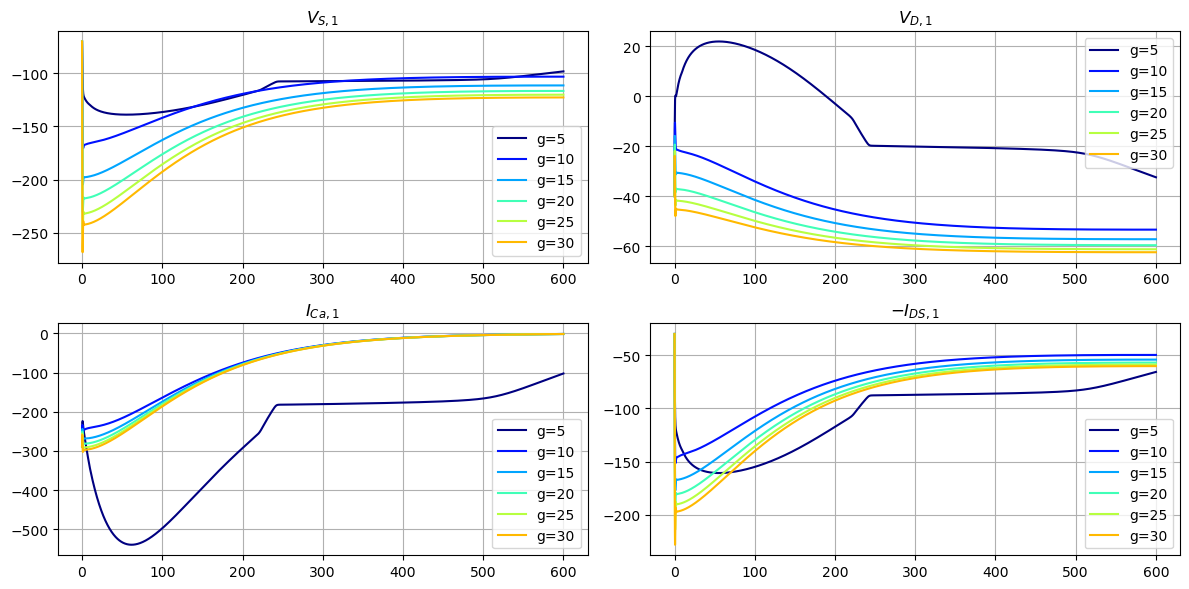

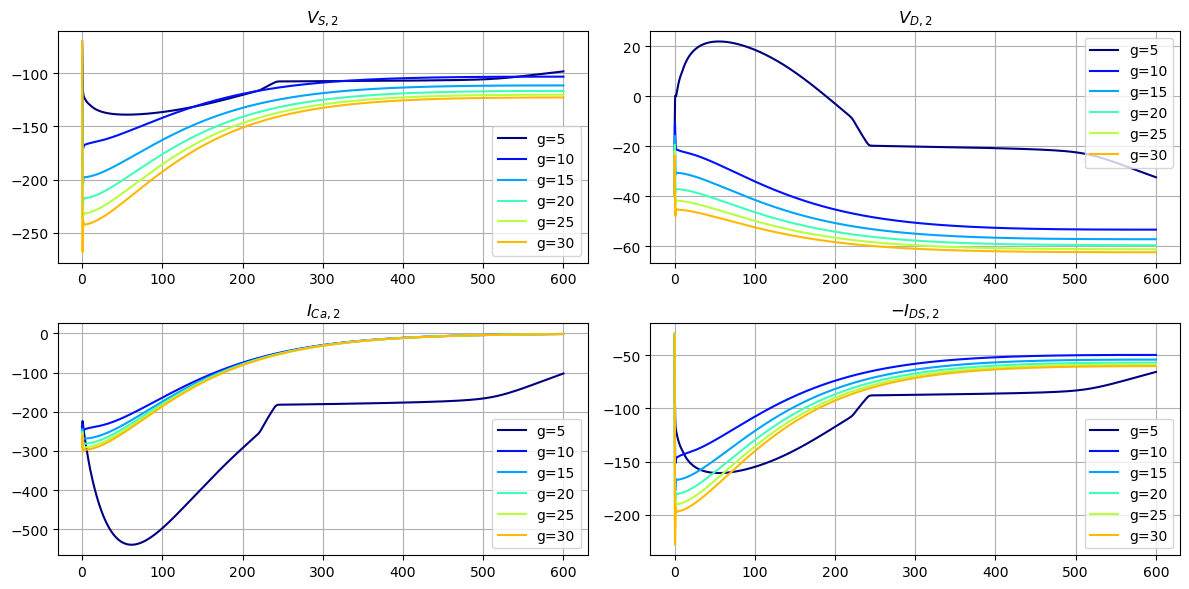

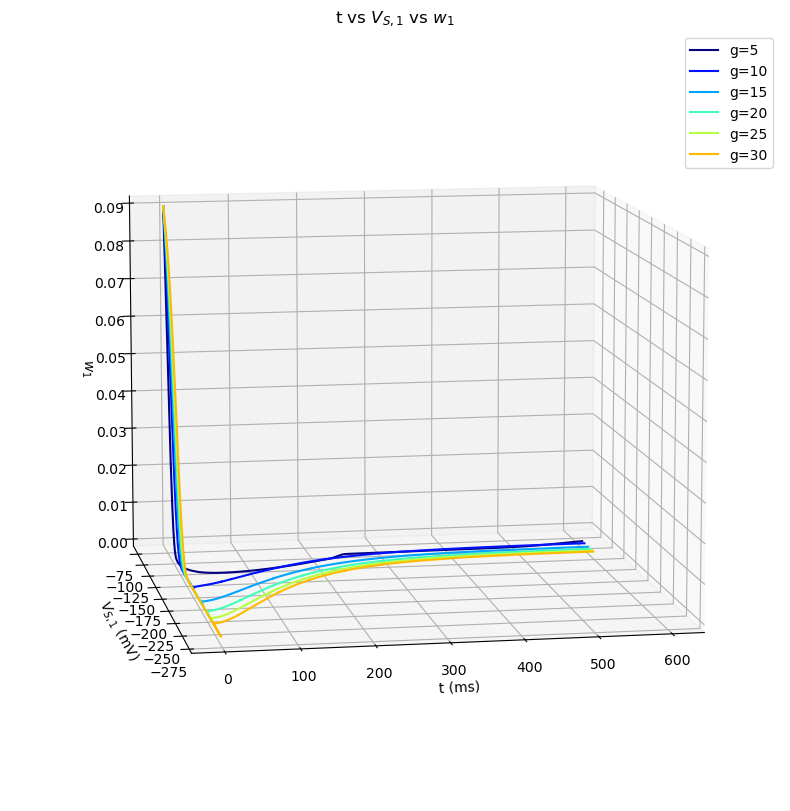

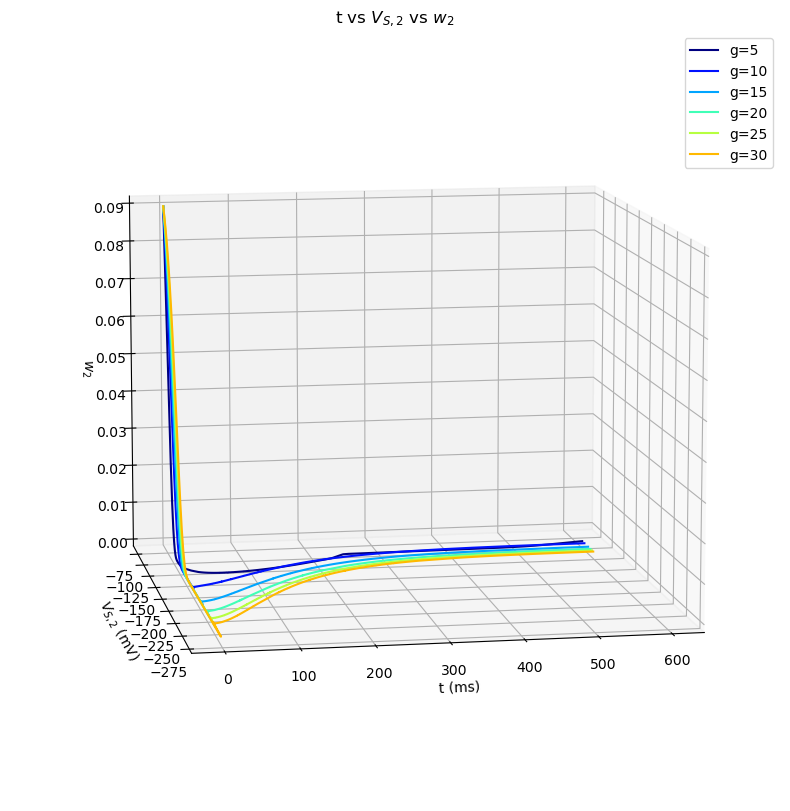

In [8]:
plot_solutions(all_data, g_values, colors)

In [9]:
### Second case: both excitatory neurons

Data['V_12'] = 0
Data['V_21'] = 0

g_values = np.arange(5, 41, 5)

all_data = {
    'time': None,
    'VS_1' : [], 'VD_1' : [],
    'ICa_1': [], 'IDS_1': [],
    'VS_2' : [], 'VD_2' : [],
    'ICa_2': [], 'IDS_2': [],
    'w_1'  : [], 'w_2'  : []
}


for g_val in g_values:

    Data['g_12'] = g_val
    Data['g_21'] = g_val

    sol = scipy.integrate.solve_ivp(
        fun=lambda t, y: dydt(t, y, Data),
        t_span=t_span,
        y0=y_init,
        t_eval=t_eval,
        method='RK45',
        atol=1e-6,
        rtol=1e-6,
        vectorized=False
    )
    
    if not sol.success:
        print(f"ODE solver failed for g = {g_val}: {sol.message}")
        continue
    else:
        print(f"ODE solver succeeded for g = {g_val}")
    
    time = sol.t
    if all_data['time'] is None:
        all_data['time'] = time

    VS_1, VD_1, w_1, n_1, h_1, c_1, q_1, Ca_1 = sol.y[:8]
    VS_2, VD_2, w_2, n_2, h_2, c_2, q_2, Ca_2 = sol.y[8:]

    # Compute currents
    IS_1, ID_1, IDS_1, INa_1, IK_1, ISL_1, ICa_1, IKC_1, IKAHP_1, IDL_1, \
        IS_2, ID_2, IDS_2, INa_2, IK_2, ISL_2, ICa_2, IKC_2, IKAHP_2, IDL_2 = \
            computeCurrents_vectorized(time, sol.y, Data)
    
    # Store quantities for plotting
    all_data['VS_1'].append(VS_1)
    all_data['VD_1'].append(VD_1)
    all_data['ICa_1'].append(ICa_1)
    all_data['IDS_1'].append(IDS_1)
    all_data['VS_2'].append(VS_2)
    all_data['VD_2'].append(VD_2)
    all_data['ICa_2'].append(ICa_2)
    all_data['IDS_2'].append(IDS_2)
    all_data['w_1'].append(w_1)
    all_data['w_2'].append(w_2)

ODE solver succeeded for g = 5
ODE solver succeeded for g = 10
ODE solver succeeded for g = 15
ODE solver succeeded for g = 20
ODE solver succeeded for g = 25
ODE solver succeeded for g = 30
ODE solver succeeded for g = 35
ODE solver succeeded for g = 40


/home/tommy/anaconda3/envs/sct4amm/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


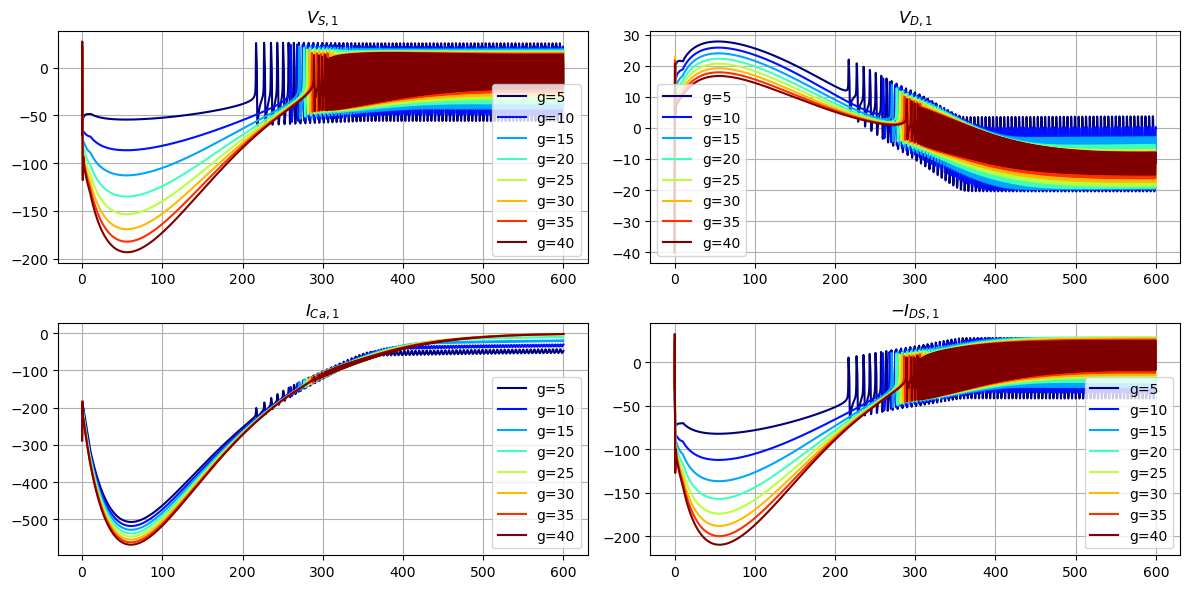

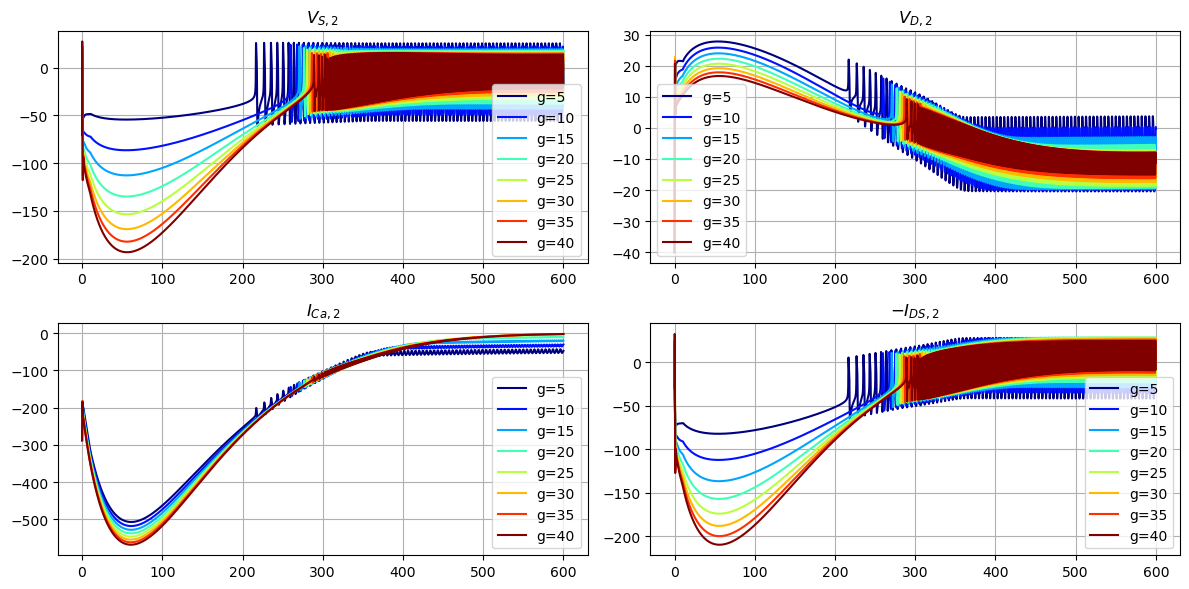

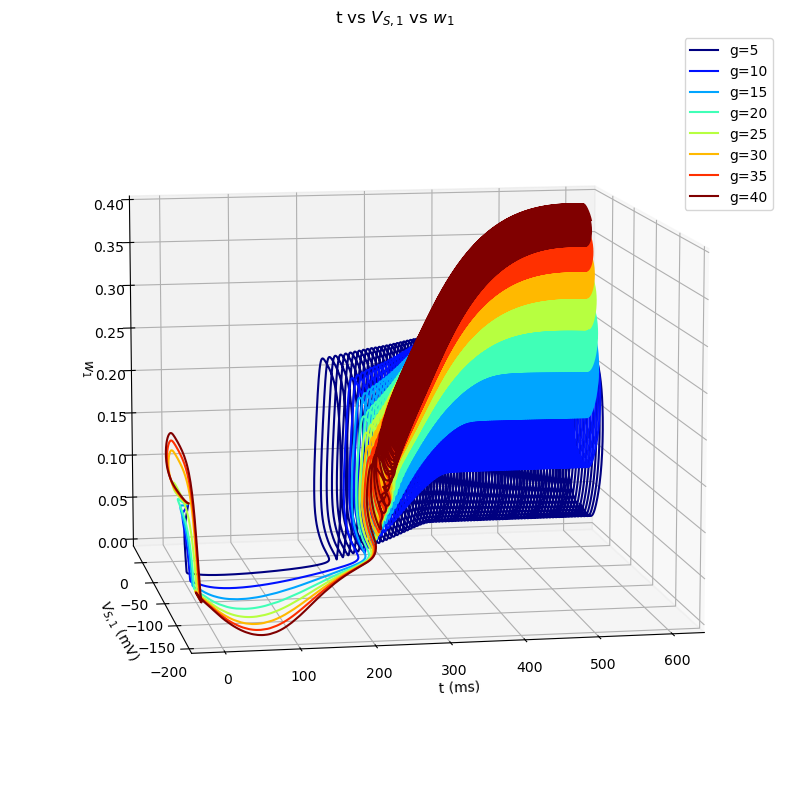

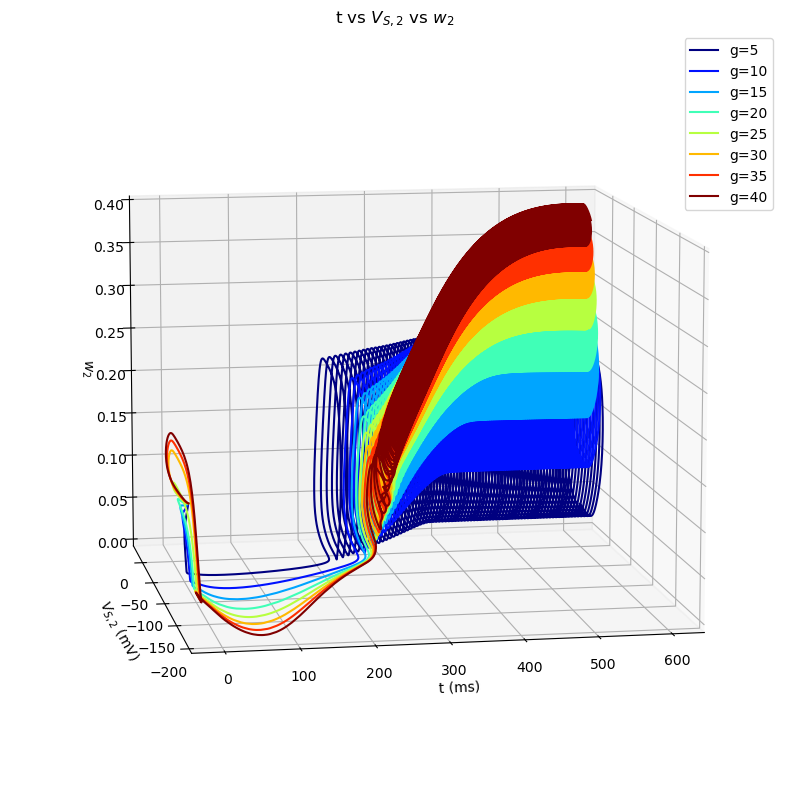

In [10]:
plot_solutions(all_data, g_values, colors)

In [ ]:
### Third case: one inhibitory neuron and one excitatory neuron

Data['V_12'] = -70
Data['V_21'] = 0

g_values = np.arange(0, 8, 1)

all_data = {
    'time': None,
    'VS_1' : [], 'VD_1' : [],
    'ICa_1': [], 'IDS_1': [],
    'VS_2' : [], 'VD_2' : [],
    'ICa_2': [], 'IDS_2': [],
    'w_1'  : [], 'w_2'  : []
}


for g_val in g_values:

    Data['g_12'] = g_val
    Data['g_21'] = g_val

    sol = scipy.integrate.solve_ivp(
        fun=lambda t, y: dydt(t, y, Data),
        t_span=t_span,
        y0=y_init,
        t_eval=t_eval,
        method='RK45',
        atol=1e-6,
        rtol=1e-6,
        vectorized=False
    )
    
    if not sol.success:
        print(f"ODE solver failed for g = {g_val}: {sol.message}")
        continue
    else:
        print(f"ODE solver succeeded for g = {g_val}")
    
    time = sol.t
    if all_data['time'] is None:
        all_data['time'] = time

    VS_1, VD_1, w_1, n_1, h_1, c_1, q_1, Ca_1 = sol.y[:8]
    VS_2, VD_2, w_2, n_2, h_2, c_2, q_2, Ca_2 = sol.y[8:]

    # Compute currents
    IS_1, ID_1, IDS_1, INa_1, IK_1, ISL_1, ICa_1, IKC_1, IKAHP_1, IDL_1, \
        IS_2, ID_2, IDS_2, INa_2, IK_2, ISL_2, ICa_2, IKC_2, IKAHP_2, IDL_2 = \
            computeCurrents_vectorized(time, sol.y, Data)
    
    # Store quantities for plotting
    all_data['VS_1'].append(VS_1)
    all_data['VD_1'].append(VD_1)
    all_data['ICa_1'].append(ICa_1)
    all_data['IDS_1'].append(IDS_1)
    all_data['VS_2'].append(VS_2)
    all_data['VD_2'].append(VD_2)
    all_data['ICa_2'].append(ICa_2)
    all_data['IDS_2'].append(IDS_2)
    all_data['w_1'].append(w_1)
    all_data['w_2'].append(w_2)

ODE solver succeeded for g = 0
ODE solver succeeded for g = 1
ODE solver succeeded for g = 2
ODE solver succeeded for g = 3
ODE solver succeeded for g = 4
ODE solver succeeded for g = 5
ODE solver succeeded for g = 6
ODE solver succeeded for g = 7


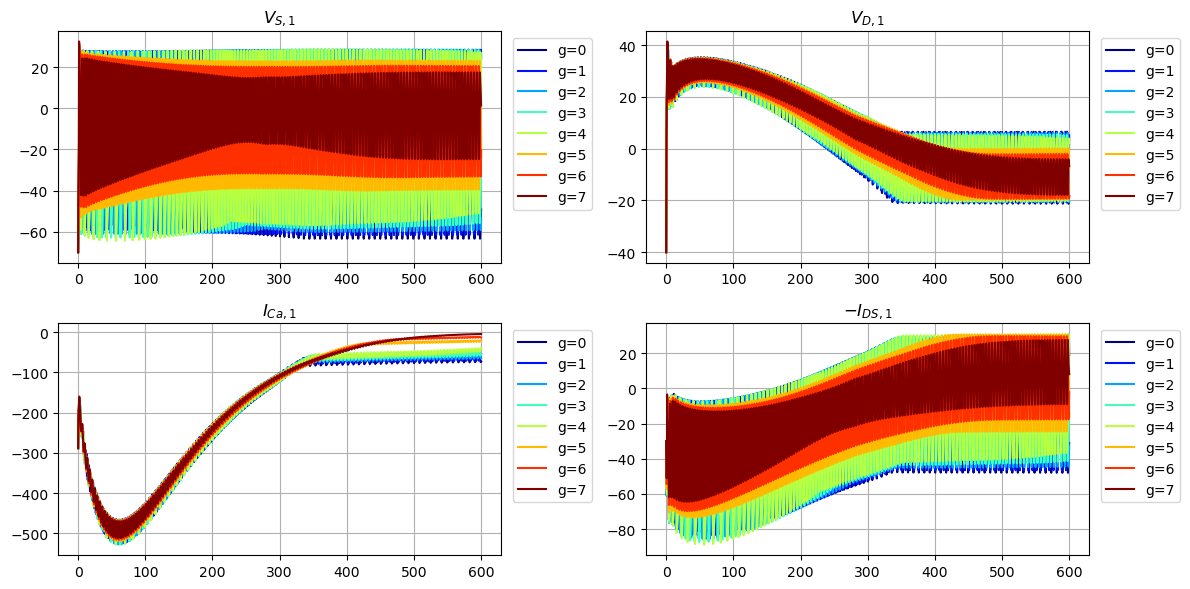

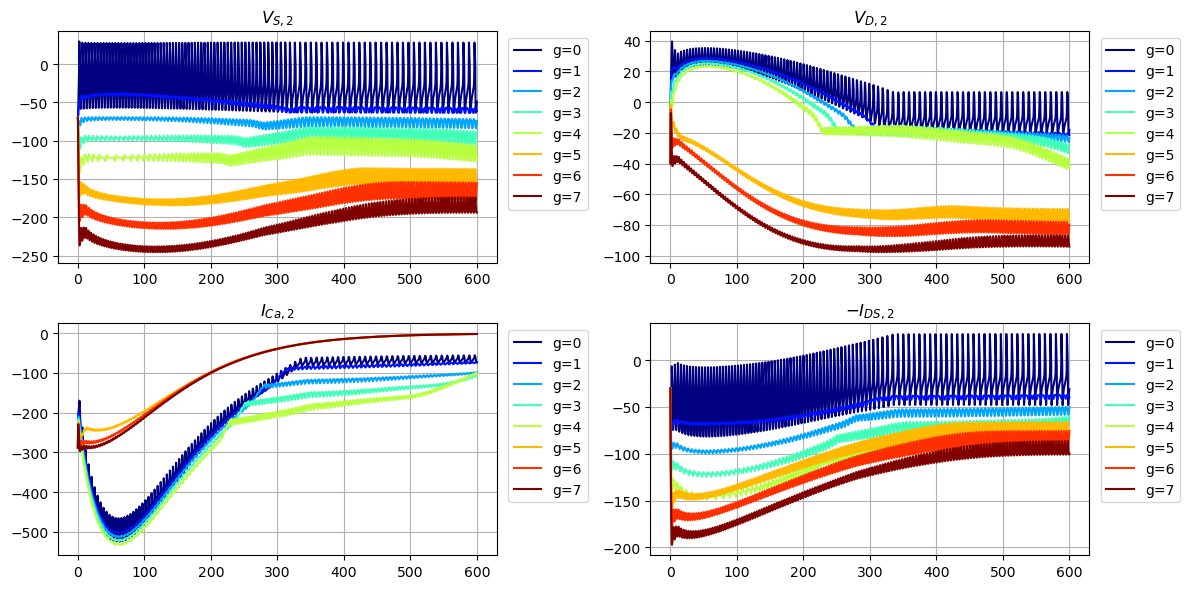

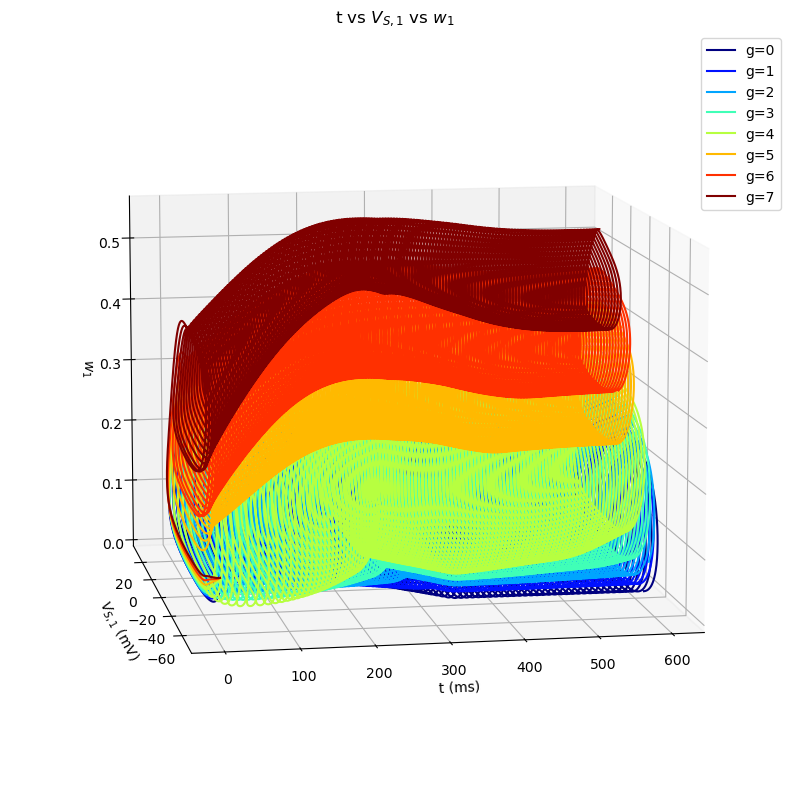

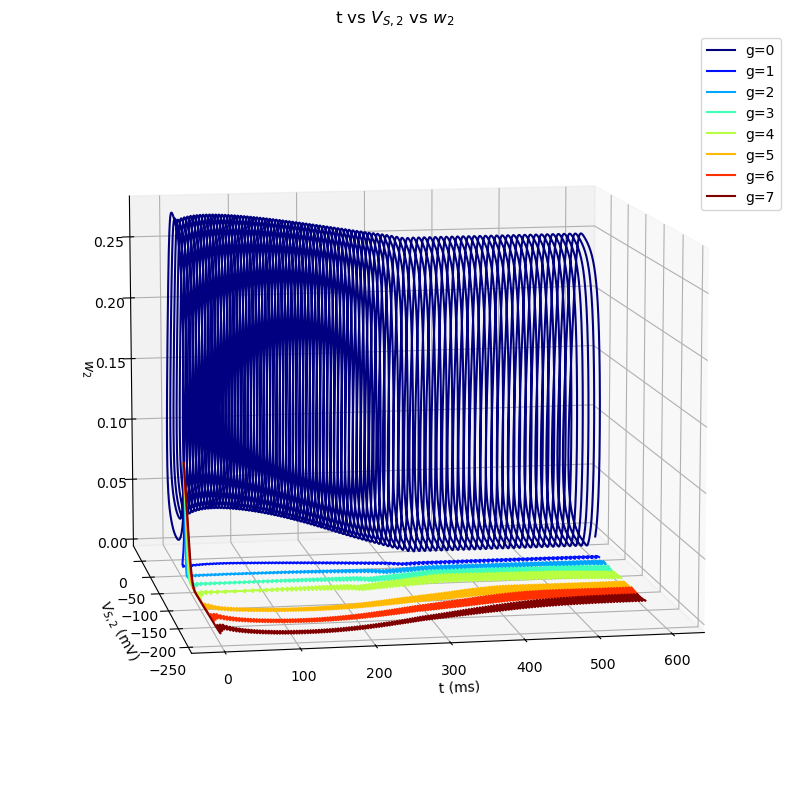

In [12]:
plot_solutions(all_data, g_values, colors)